In [40]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Import file, examine it's structure and content

In [2]:
df = pd.read_csv('CardioGoodFitness.csv')

df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [26]:
# Check dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### Examine data for duplicates/nulls

In [24]:
print(f"There are {sum(df.duplicated())} duplicate values")

There are 0 duplicate values


- Data has no duplicates and looks to be well structured (without junk values)
- Data contains information about a customer's age, fitness level, education, income, marital status, etc
- Data also contains no nulls, so the CSV will be good to go after changing object types to category

In [34]:
df['Product'] = df.Product.astype('category')
df['Gender'] = df.Gender.astype('category')
df['MaritalStatus'] = df.MaritalStatus.astype('category')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.4 KB


In [31]:
# Check the five number summary
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [29]:
# Check the median of numerical columns
df.median()

Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       50596.5
Miles           94.0
dtype: float64

In [28]:
# Check the mode of each value
df.mode()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,25,Male,16,Partnered,3,3,45480,85


### Initial Observations:
- Customers are primarily young adults (18 - 33)
- The majority have completed some college (bachelor's degree, specifically)
- Most are casual exercisers with above average fitness level


### Examine Basic Univariate Stats

In [47]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    
    
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

### Let's look at our numerical variables

### Age Observations

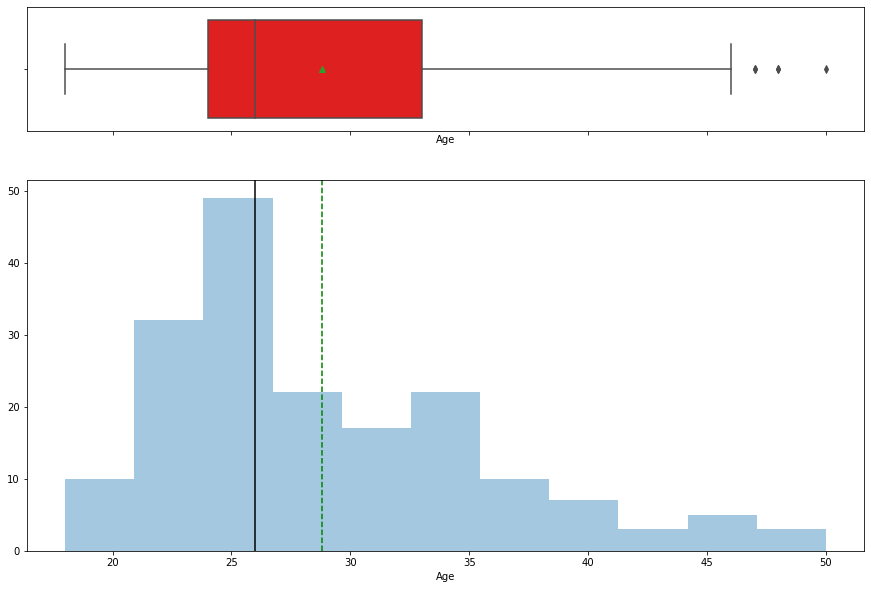

In [41]:
histogram_boxplot(df.Age)

Observations:
- Data distribution is skewed to the right
- The majority of customers are under 30
- Median age is about 26 whereas the mean is about 29
- Not a ton of outliers
- While customers are generally younger, there is a non-trivial amount of 40+ customers

### Education Observations

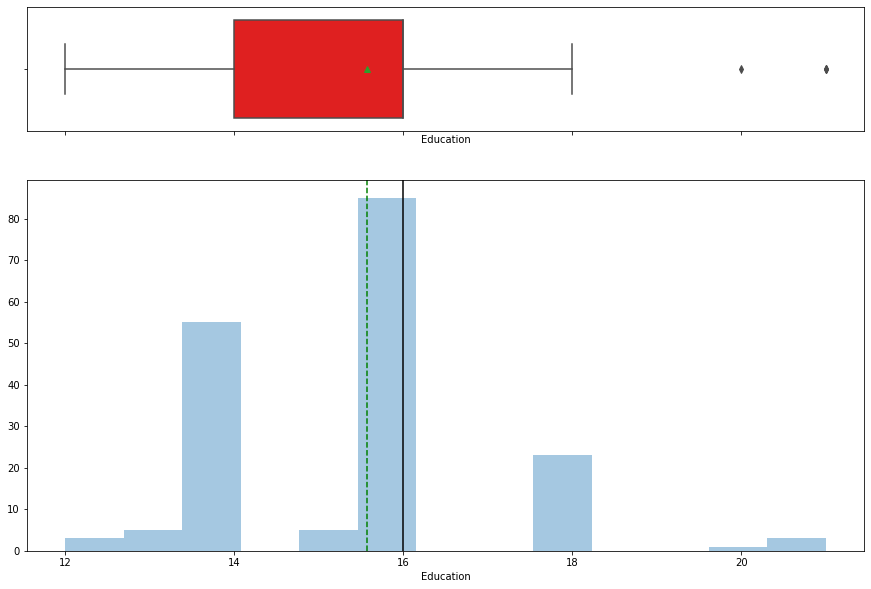

In [42]:
histogram_boxplot(df.Education)

Observations:
- Distribution is close to normal
- The majority of customers are college educated (bachelor's degree or above)
- Not very many outliers
- Effectively all customers have some level of college education

### Usage Observations

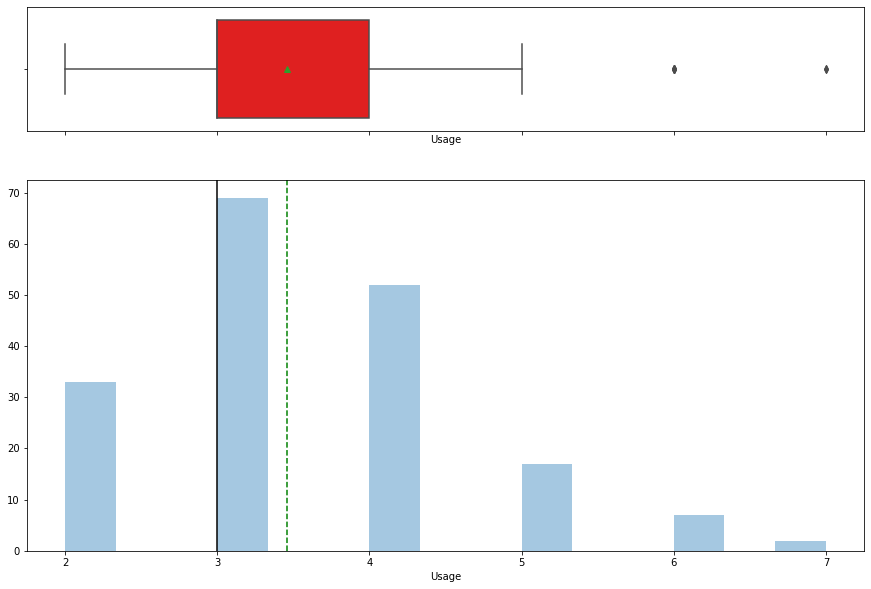

In [43]:
histogram_boxplot(df.Usage)

Observations:
- Distribution is right skewed
- The vast majority of customers intend to use the treadmill 2-4 times per week
- This suggests that the client base may be primarily casual fitness enthusiasts
- Only a few outliers of those who would use the products 6-7 days per week

### Fitness Observations

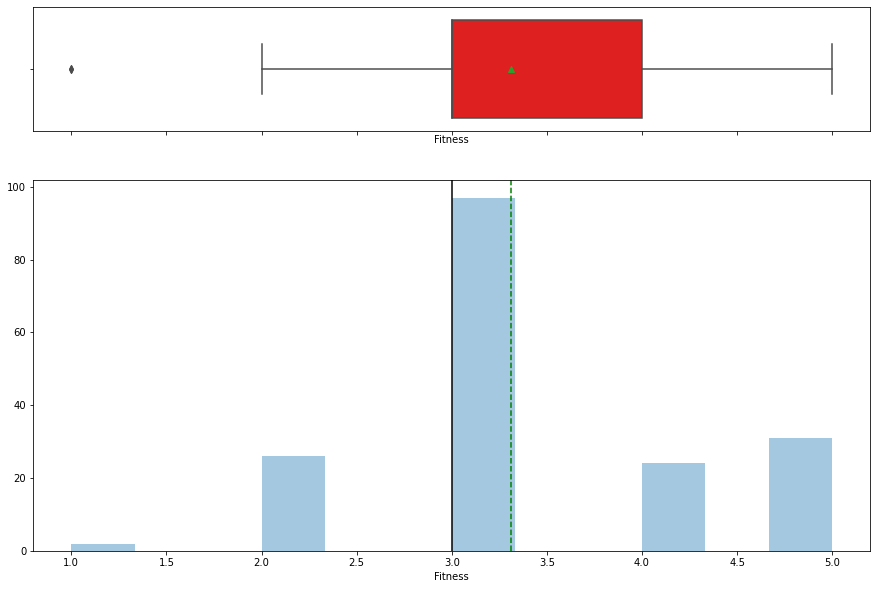

In [44]:
histogram_boxplot(df.Fitness)

Observations:
- Distribution is close to normal with a non significant number of outliers
- The vast majority of customers are either in above average shape or better
- This suggests that the product is not as popular with those looking to get in shape compared to those already in shape

### Income Observations

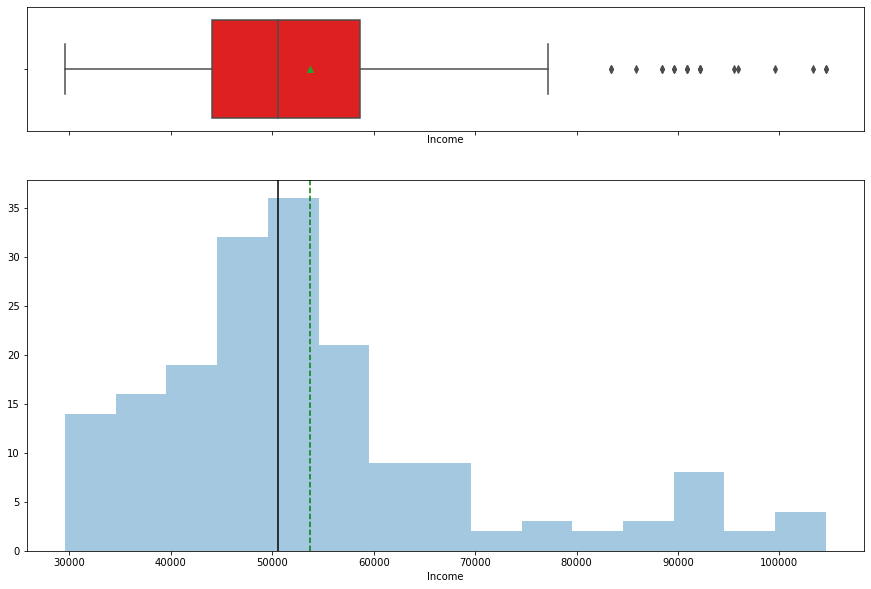

In [45]:
histogram_boxplot(df.Income)

Observations:
- Data is skewed to the right with a fair amount of outliers
- The median income is around 50,000 with an average slightly higher than that
- There is a pretty significant range of incomes, suggesting the products are popular with many types of customers

### Miles Observations

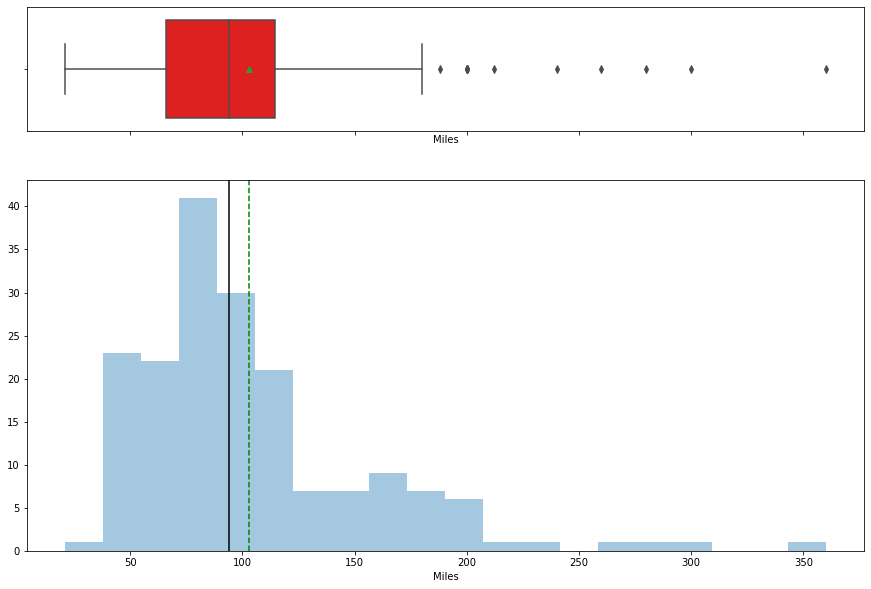

In [46]:
histogram_boxplot(df.Miles)

Observations:
- Data is skewed to the right with a fair amount of outliers
- Both the average and median value are very close to each other (around 100 miles)
- Because they are both around 100 miles, it indicates an intermediate fitness level
- This reinforces the notion that cutsomers are already in good shape and just looking to maintain themselves (running a fair amount, but nothing extreme)

### Let's look at our categorical variables

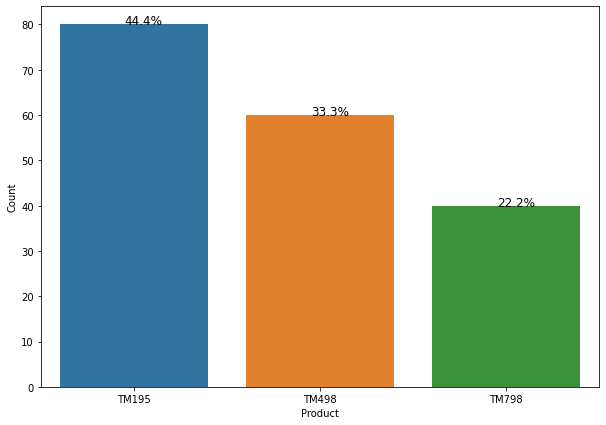

In [48]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df['Product'])
plt.xlabel('Product')
plt.ylabel('Count')
bar_perc(ax,df['Product'])

Observations:
- The TM195 is the best seller with the TM489 and TM789 decreasing by 11.1% and 22.2%

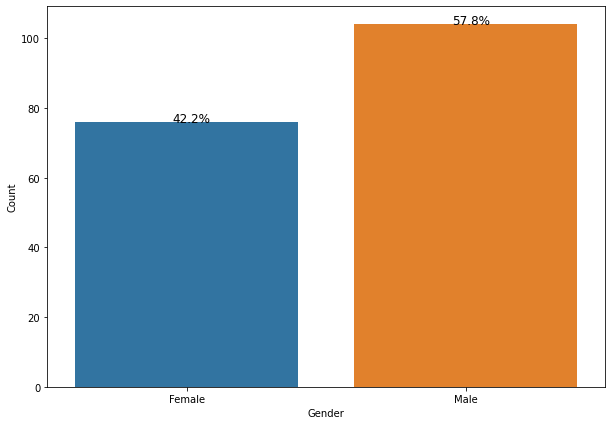

In [49]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df['Gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
bar_perc(ax,df['Gender'])

Observations:
- A slight majority of customers are men

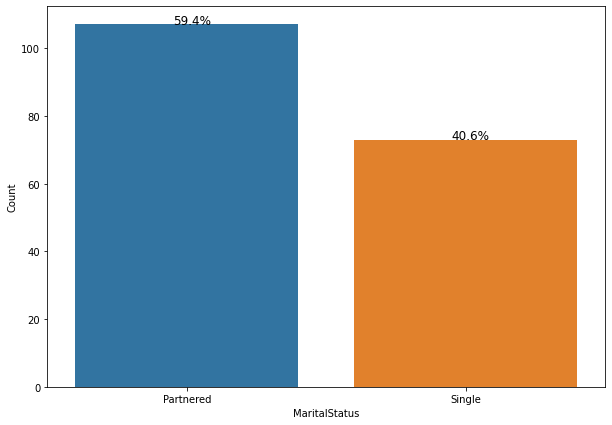

In [50]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df['MaritalStatus'])
plt.xlabel('MaritalStatus')
plt.ylabel('Count')
bar_perc(ax,df['MaritalStatus'])

Observations:
- A slight majority of customers are not single

### Let's look closer at some Bivariate analysis

In [32]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<AxesSubplot:>

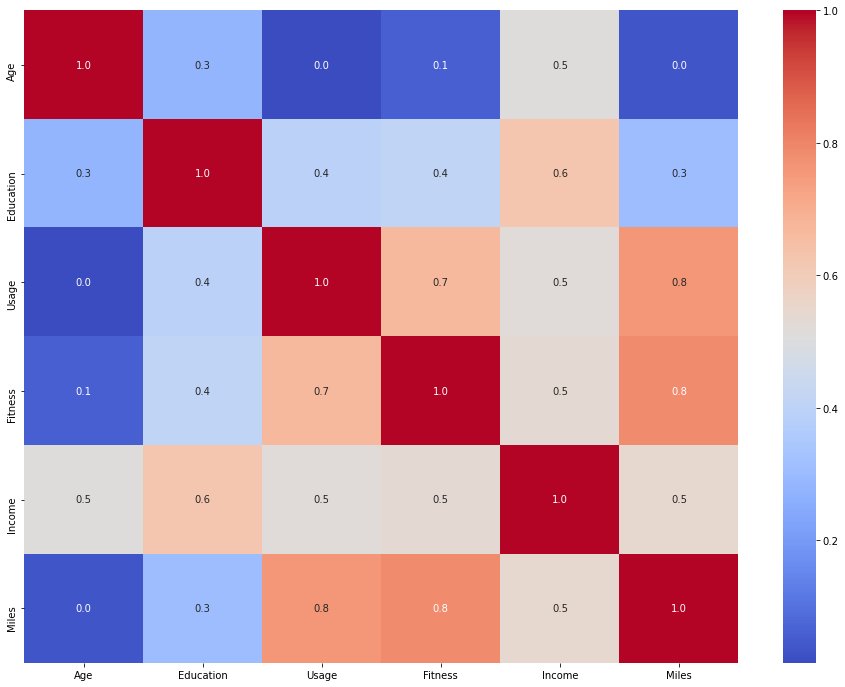

In [53]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm',
        fmt=".1f",
        xticklabels=df.corr().columns,
        yticklabels=df.corr().columns)

Observations:
- Unsurprisingly usage and fitness correspond highly with miles run
- Income does not seem to correlate strongly with anything
- As expected, age correlates strongly negative with every variable except income
- It would appear that fitness/usage/miles are the most significantly related variables

### Bivariate Scatter Plots

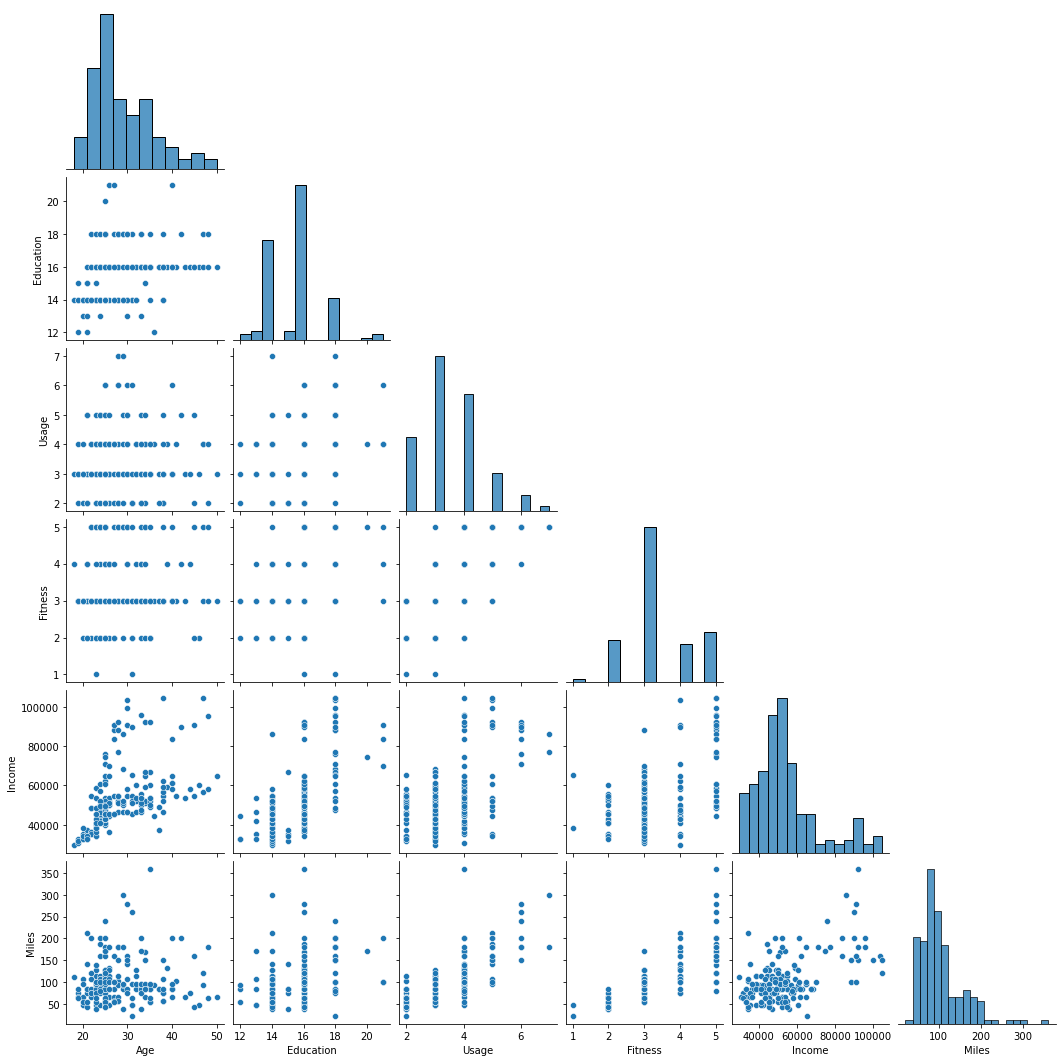

In [54]:
sns.pairplot(df, corner=True)

Observations:
- Same trends as above are on display here
- Usagge and fitness correspond highly with miles run (as expected)

### Let's check usage/fitness/mileage stats across product type

Text(0.5, 0, 'Product')

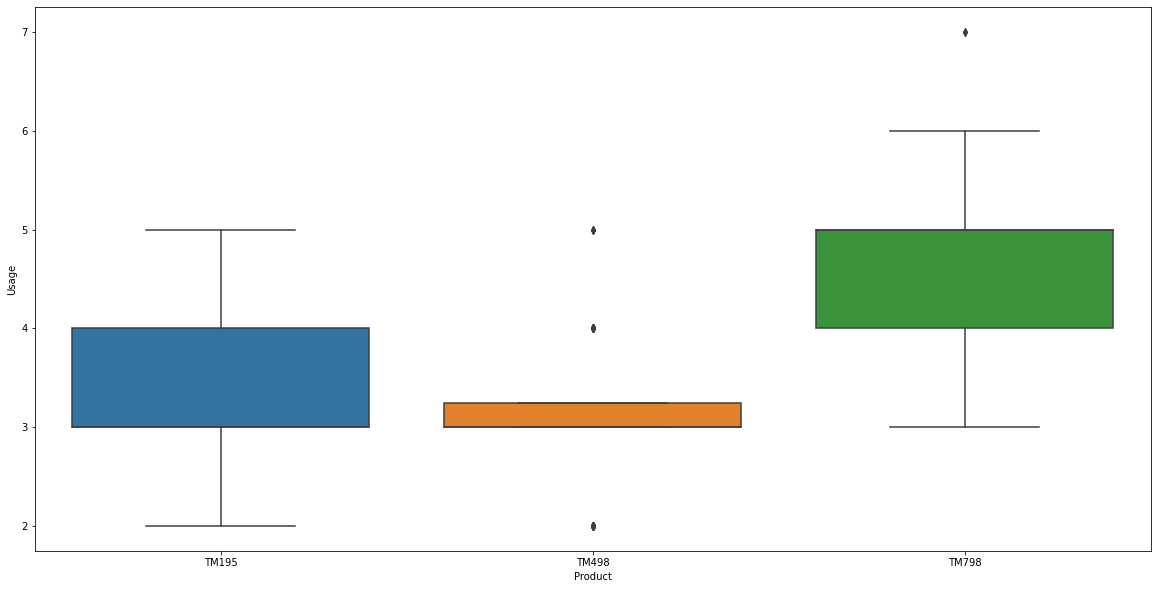

In [56]:
plt.figure(figsize=(20,10))           
sns.boxplot(df['Product'],df['Usage'])
plt.ylabel('Usage')
plt.xlabel('Product')

Observations
- There is a clear preference that customers with higher usage rates prefer the TM798
- The TM498 is not nearly as popular

Text(0.5, 0, 'Product')

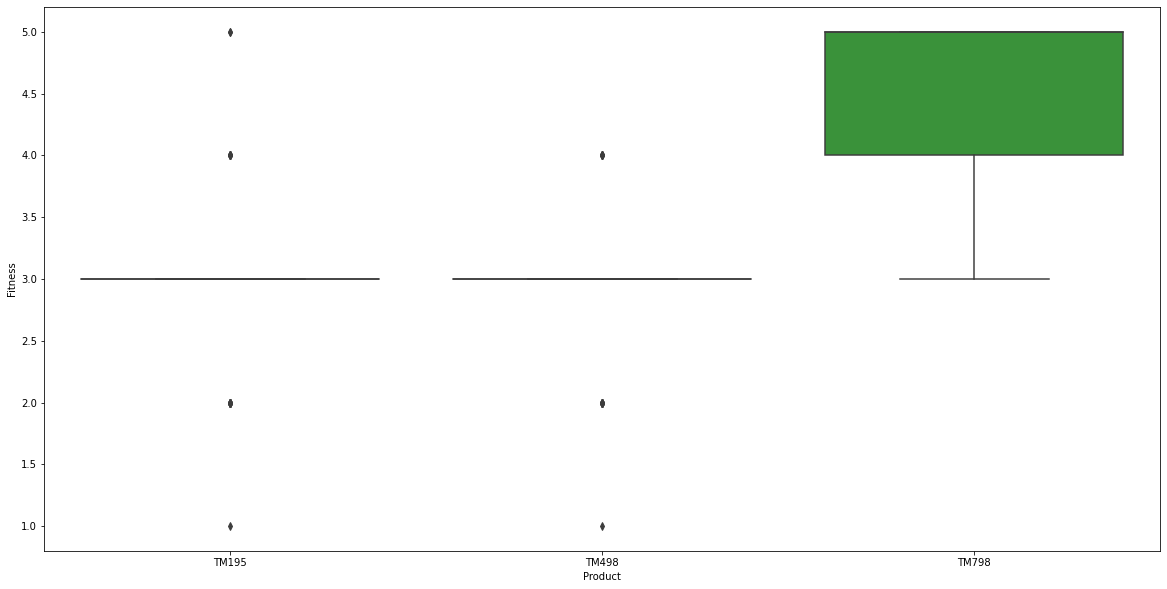

In [57]:
plt.figure(figsize=(20,10))           
sns.boxplot(df['Product'],df['Fitness'])
plt.ylabel('Fitness')
plt.xlabel('Product')

Observations
- Following up on the previous trend, the TM798 is extremely popular with highly fit customers

Text(0.5, 0, 'Product')

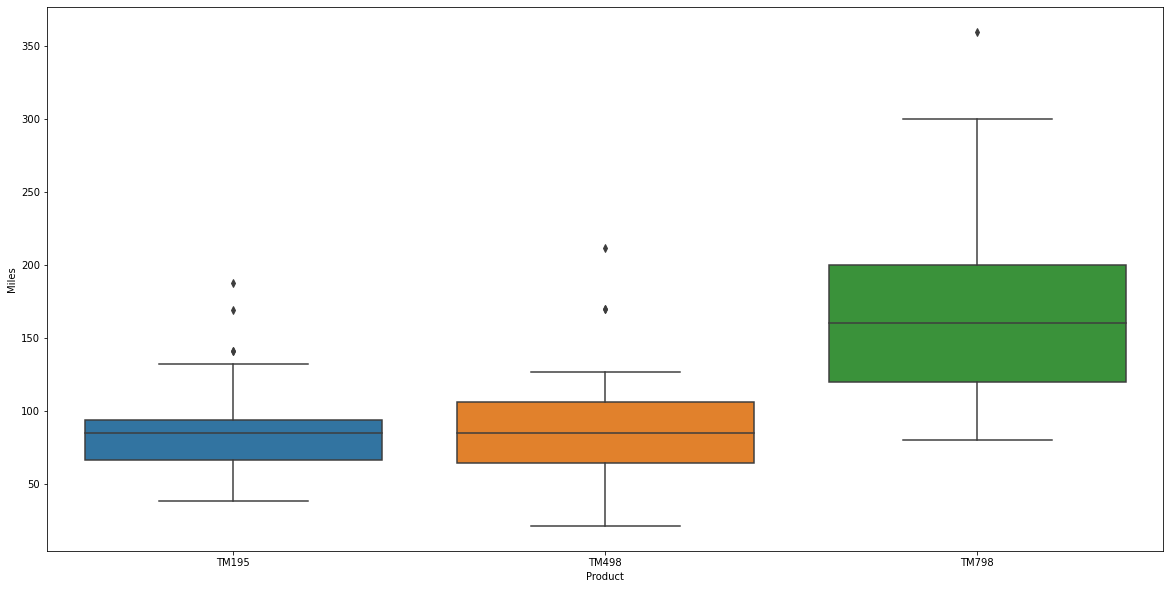

In [58]:
plt.figure(figsize=(20,10))           
sns.boxplot(df['Product'],df['Miles'])
plt.ylabel('Miles')
plt.xlabel('Product')

Observations
- Following up on the previous trends, the TM798 is extremely popular with high mileage customers
- The other two products sell quite well with customers that run more modest mileages

### Let's factor in gender/relationship status to our key stats, Miles, Fitness, Usage

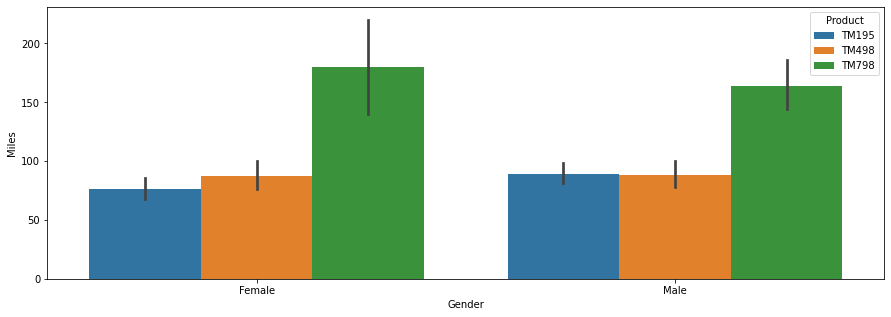

In [59]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='Gender',y='Miles',hue='Product')
plt.show()

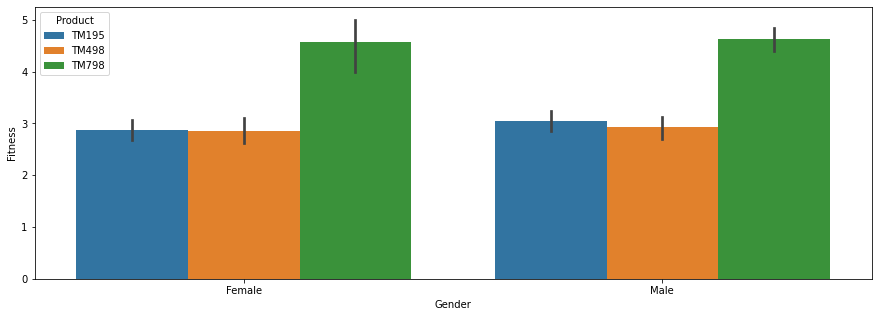

In [60]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='Gender',y='Fitness',hue='Product')
plt.show()

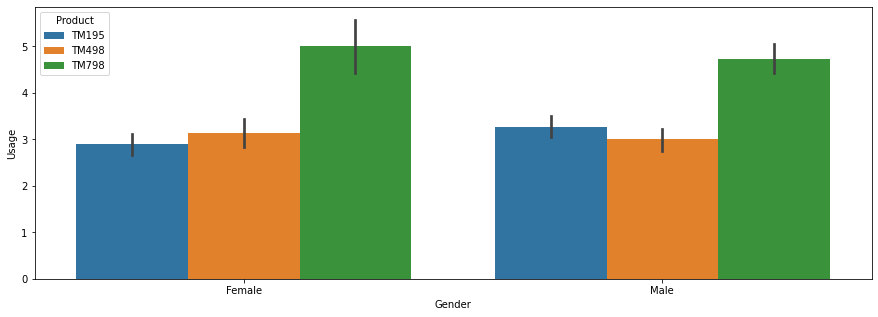

In [61]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='Gender',y='Usage',hue='Product')
plt.show()

Observations
- No obvious trend emerges from gender; male and female stats appear similar
- As shown previously, the TM798 is the most popular product

### Let's check the same stats vs Marital Status

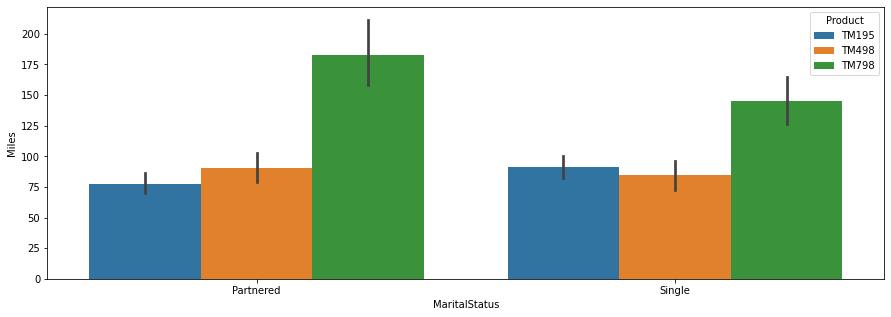

In [62]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='MaritalStatus',y='Miles',hue='Product')
plt.show()

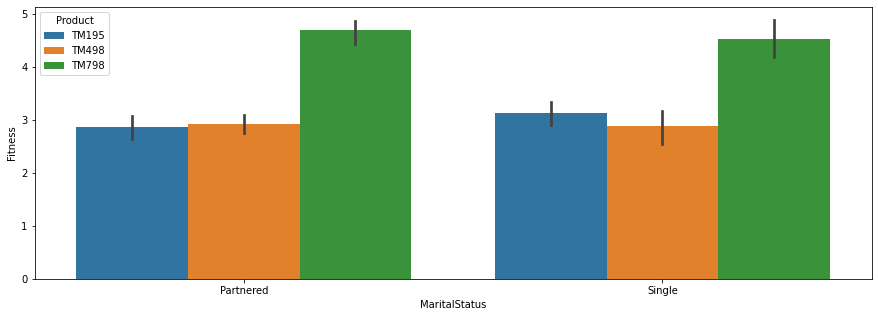

In [63]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='MaritalStatus',y='Fitness',hue='Product')
plt.show()

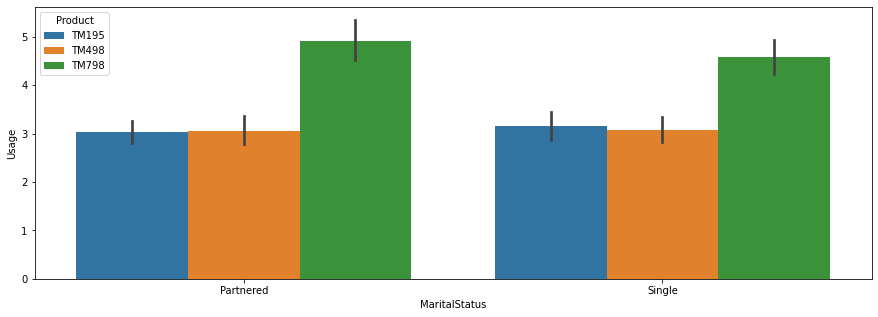

In [64]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='MaritalStatus',y='Usage',hue='Product')
plt.show()

Observations:
- Despite being the lowest selling model, the TM798 is hugely correlated with highly fit customers
- Even though the TM498 has lower sales than the TM195, they share the same popular customer profile

## Conclusion and Recommendations

### Conclusion

Cardio Good Fitness provided data on the demographics of 180 customers who bought one of three treadmills. The data contained information about gender, age, marital status, fitness level/usage, education, and income. After exploratory data analysis the following conclusions were drawn:

1. The average customer is a college educated young adult (18-33) who is already in average shape or better
2. Age had a strong negative correlation with every variable except income
3. Aside from Fitness/Usage/Miles, there were no other strong correlations in the data
4. Despite having the lowest sales, the TM798 correlates very strongly with the most fit customers
5. Although the TM195 has higher sales than the TM498, they share a similar target customer and therefore may be competing against each other


### Recommendations

1. The TM798 sells poorly, but is very popular with serious athletes. Stronger marketing efforts for this product could increase sales
2. The vast majority of customers are 33 years old or under. Marketing a product that is more suitable for older users could help capture a larger market.
3. The TM195 and TM498 seem to share very strong correlations with key variables (fitness/usage/miles). With the TM195 outperforming the sales of the TM498, it may be worth rebranding one to distinguish it to a different demographic (perhaps to an older clientele?)
4. The median income of customers was $50,596 per year. There were also no strong correlations with income, suggesting that these products are widely popular. It could be beneficial to market either a premium treadmill to higher earners, or a budget treadmill to low earners (or perhaps both!)
5. Procure pricing data of each model of treadmill to build a model to predict optimal pricing


### Further Analysis

1. Dig deeper into the difference between treadmills to identify key characteristics that make them more popular.
2. Obtain pricing info to create models that can predict how modifying prices could increase sales.
3. Similarly, with pricing information you could perform analysis to see which demographic is more likely to buy a particular model

In [67]:
from pandas_profiling import ProfileReport
# Use the original dataframe, so that original features are considered
prof = ProfileReport(df)
# to view report created by pandas profile
prof